## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
df = pd.read_csv('https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz')


In [2]:
df

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT
...,...,...
30160,reçu à la mairie de biarritz à l'occasion d'un...,FRA
30161,la française malia metella a remporté le titre...,SPO
30162,1 pourquoi avoir choisi les années 1950 pour k...,ART
30163,la croix a licencié un journaliste alain herto...,ENT


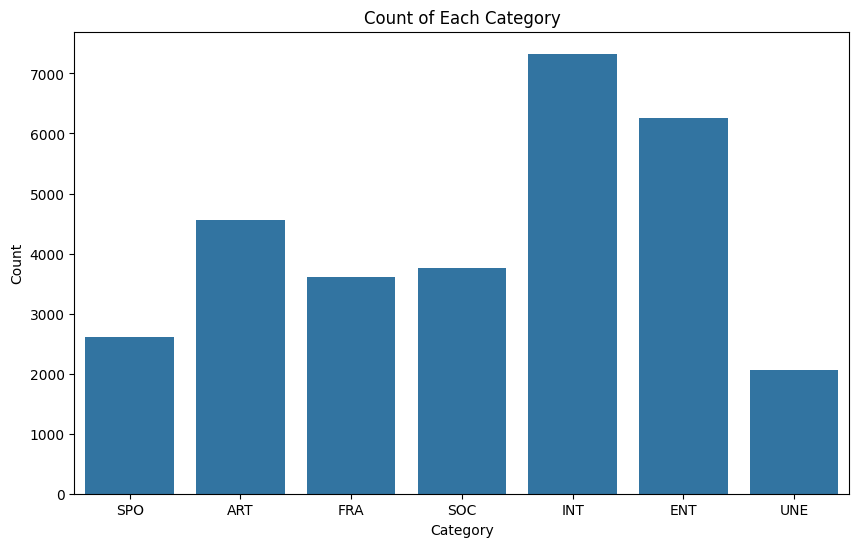

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
# Create a count plot for the 'category' column
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)

# Add titles and labels
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [4]:
import textwrap
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
print("Random sample of 5 articles:")
# Choisir la largeur maximale par ligne (ici 80 caractères)
line_width = 80

# Parcourir et afficher chaque article avec des retours à la ligne automatiques
examples = df.sample(5)
for idx, article in zip(examples.index, examples['text']):
    print(f"Article n°{idx}")
    print(textwrap.fill(article, width=line_width))
    print("\n" + "-" * 80 + "\n")  # Séparateur entre les articles


Random sample of 5 articles:
Article n°16838
le tour de france fête son centenaire alors qu'il n'en est qu'à sa 90e édition
ce décalage s'explique par les interruptions dues aux deux guerres mondiales qui
ont sans doute privé le belge philippe thys et l'italien gino bartali d'un
palmarès plus étoffé thys a dû patienter six ans entre sa deuxième et sa
troisième victoire entre 1914 et 1920 gino le pieux a lui emporté le tour pour
la première fois en 1938 et il a ensuite attendu dix ans avant de triompher une
seconde fois à 34 ans le tour n'a repris qu'en 1947 victoire de jean robic mais
auparavant du 10 au 14 juillet 1946 les journaux communistes ce soir sports et
miroir sprint avaient organisé la ronde de france qui reliait bordeaux à
grenoble par les pyrénées et les alpes une dizaine de jours plus tard jacques
goddet et emilien amaury propriétaire du vélodrome du parc des princes ont lancé
la course du tour de france avec le parisien libéré entre monaco et paris du 23
au 28 juillet en 

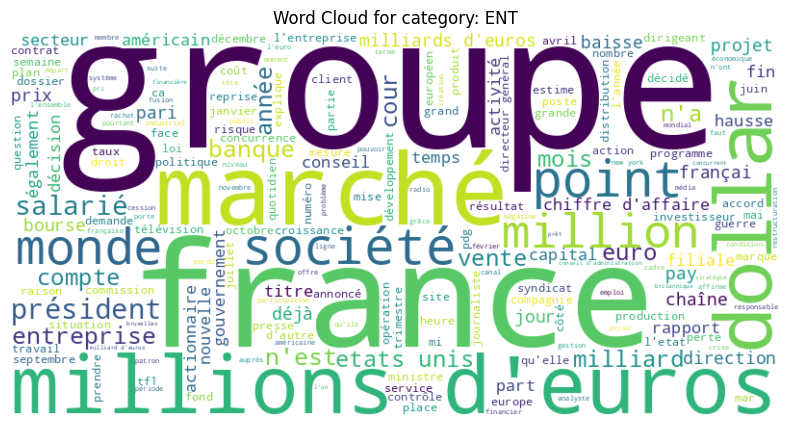

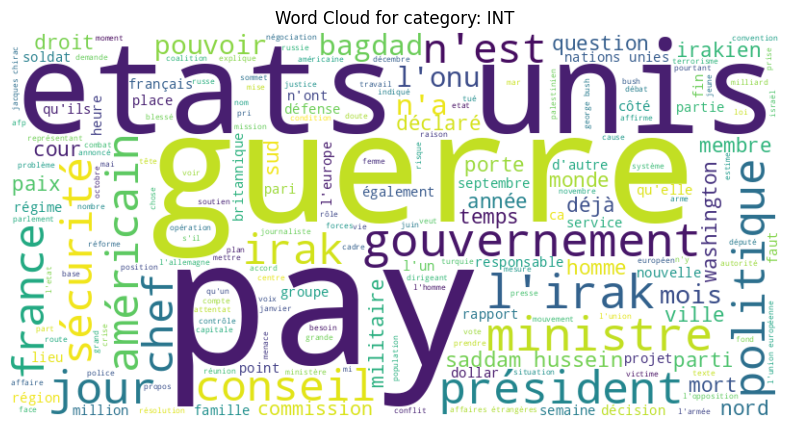

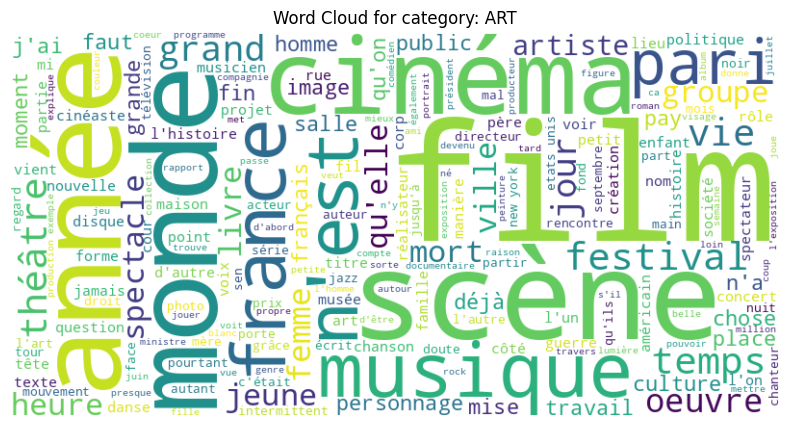

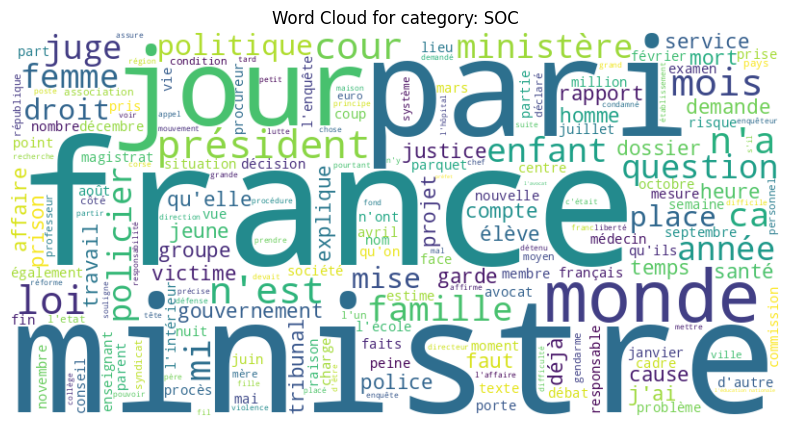

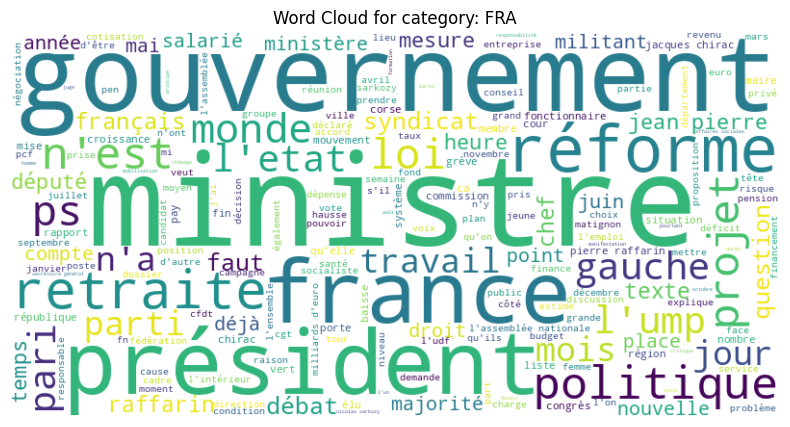

In [6]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # Filter the DataFrame for the current category
    df_cat = df[df['category'] == cat]

    # Combine all articles in the category into one string
    text = " ".join(df_cat['text'].tolist())

    # Create the word cloud object
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for category: {cat}")
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [11]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
X = df['text']
y = df['category']
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test_val,y_test_val, test_size=0.5 )

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)
# fit on train data
vectorizer.fit(X_train)
# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_val_counts = vectorizer.transform(X_val)

In [24]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB

classifier = MultinomialNB()

# Train 
classifier.fit(X_train_counts, y_train)

# Evaluate 
train_score = classifier.score(X_train_counts, y_train)
val_score = classifier.score(X_val_counts, y_val)
print("\nClassification Accuracy:")
print(f"Training set: {train_score:.4f}")
print(f"Validation set: {val_score:.4f}")



Classification Accuracy:
Training set: 0.7303
Validation set: 0.7209


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
# We'll test different configurations
max_features_options = [1000, 2000, 5000]
use_idf_options = [True, False]  # Test with and without IDF
alpha_options = [0.1, 1.0, 10.0]  # Smoothing parameter for Naive Bayes

# Store results
results = []

for max_features in max_features_options:
    for use_idf in use_idf_options:
        for alpha in alpha_options:
            # Create and fit the vectorizer on training data only
            vectorizer = CountVectorizer(max_features=max_features)
            X_train_counts = vectorizer.fit_transform(X_train)
            X_val_counts = vectorizer.transform(X_val)
            X_test_counts = vectorizer.transform(X_test)
            
            # Apply TF-IDF transformation
            tfidf = TfidfTransformer(use_idf=use_idf)
            X_train_tfidf = tfidf.fit_transform(X_train_counts)
            X_val_tfidf = tfidf.transform(X_val_counts)
            X_test_tfidf = tfidf.transform(X_test_counts)
            
            # Train classifier
            clf = MultinomialNB(alpha=alpha)
            clf.fit(X_train_tfidf, y_train)
            
            # Get scores
            train_score = clf.score(X_train_tfidf, y_train)
            val_score = clf.score(X_val_tfidf, y_val)
            test_score = clf.score(X_test_tfidf, y_test)
            
            # Store configuration and results
            config = {
                'max_features': max_features,
                'use_idf': use_idf,
                'alpha': alpha,
                'train_accuracy': train_score,
                'val_accuracy': val_score
            }
            results.append(config)

# Find best configuration based on validation score
best_config = max(results, key=lambda x: x['val_accuracy'])
print("\nBest configuration (based on validation accuracy):")
print("-" * 80)
print(f"Max Features: {best_config['max_features']}")
print(f"Use IDF: {best_config['use_idf']}")
print(f"Alpha: {best_config['alpha']}")
print(f"Train Accuracy: {best_config['train_accuracy']:.4f}")
print(f"Validation Accuracy: {best_config['val_accuracy']:.4f}")




Best configuration (based on validation accuracy):
--------------------------------------------------------------------------------
Max Features: 5000
Use IDF: True
Alpha: 0.1
Train Accuracy: 0.8130
Validation Accuracy: 0.7932


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# YOUR CODE HERE



## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

# Plot the statistics of classes

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.